In [2]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     ------------ ------------------------- 102.4/314.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --------------------- ------------------ 1.6/3.0 MB 34.9 MB/s eta 0:00:01
     --

[*********************100%%**********************]  1 of 1 completed


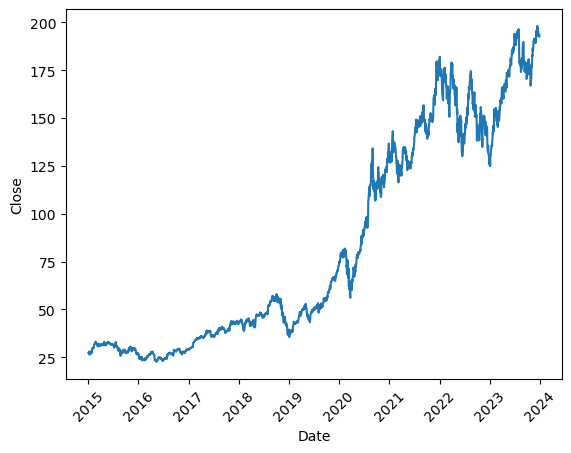

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   27.847500   27.860001   26.837500   27.332500   24.435265   
2015-01-05   27.072500   27.162500   26.352501   26.562500   23.746887   
2015-01-06   26.635000   26.857500   26.157499   26.565001   23.749126   
2015-01-07   26.799999   27.049999   26.674999   26.937500   24.082138   
2015-01-08   27.307501   28.037500   27.174999   27.972500   25.007425   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

               Volume  
Date         

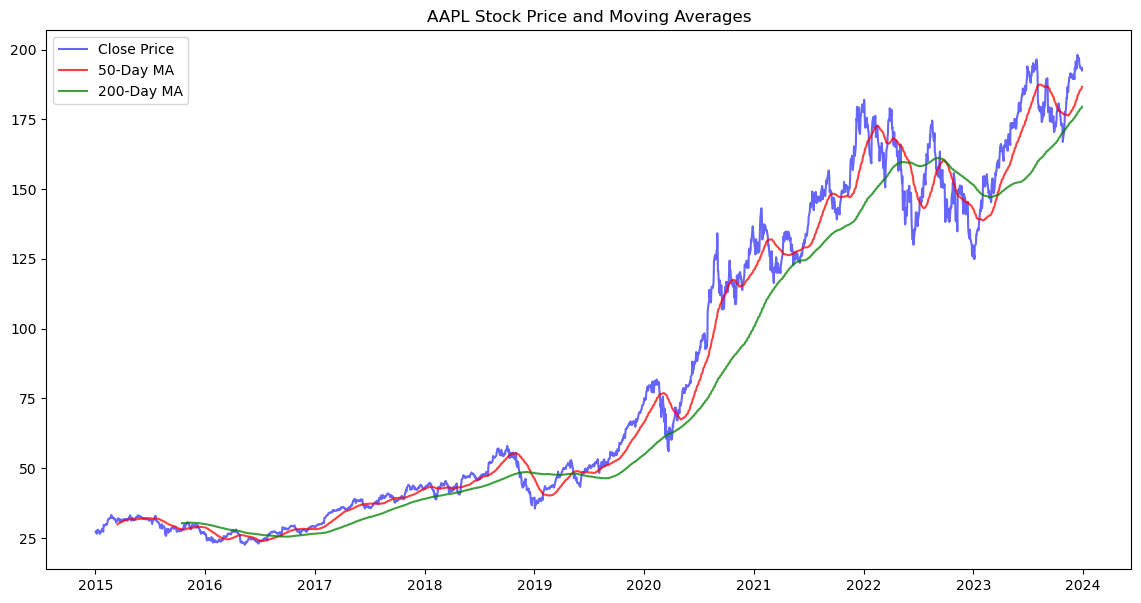

                 Close     Volume      MA_50      MA_200
Date                                                    
2021-02-03  133.940002   89880900  128.58380  108.127262
2023-08-07  178.850006   97576100  187.22700  160.188900
2021-02-05  136.759995   75693800  129.44300  108.817425
2021-01-25  142.919998  157611700  126.12340  105.789487
2015-11-27   29.452499   52185600   28.78380   30.465212
...                ...        ...        ...         ...
2021-02-19  129.869995   87668800  131.85980  111.603187
2018-08-08   51.812500   90102000   47.86135   44.417700
2017-02-09   33.105000  113399600   29.63535   27.037700
2019-10-14   58.967499   96427600   53.64280   48.246837
2017-06-01   38.294998   65616400   36.78205   31.439025

[413 rows x 4 columns]
                 Close     Volume       MA_50      MA_200
Date                                                     
2015-11-18   29.322500  186698800   28.674550   30.491962
2015-11-20   29.825001  137148400   28.731050   30.490975
201

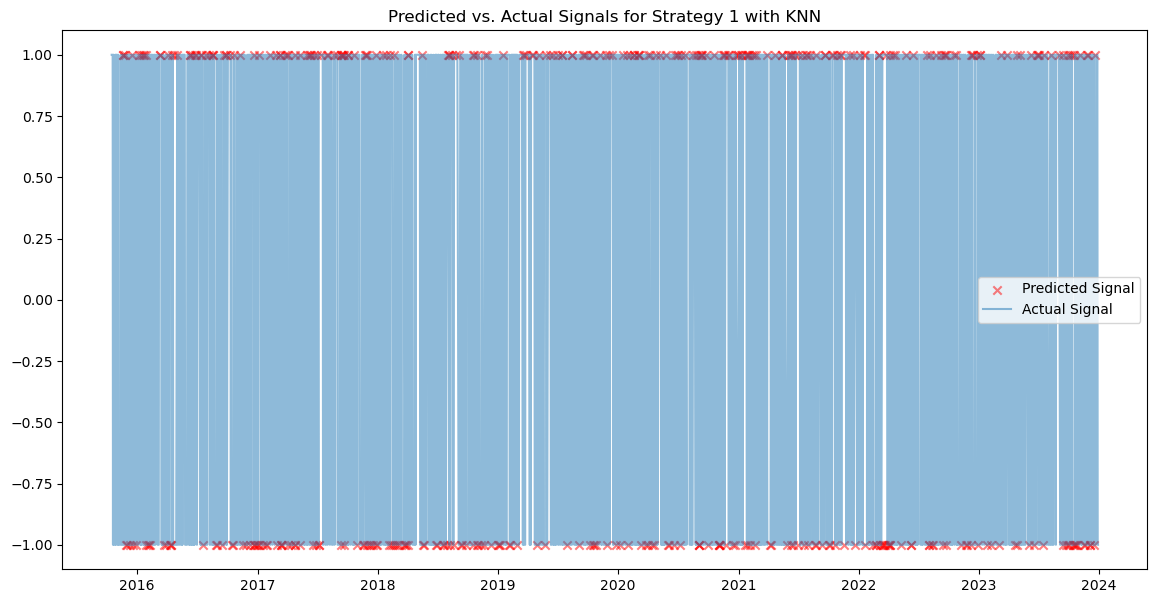

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Downloading stock data
stock_data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")

sns.lineplot(x='Date', y='Close', data=stock_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print(stock_data)

# Feature engineering: calculating moving averages
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(stock_data.index, stock_data['MA_50'], label='50-Day MA', color='red', alpha=0.75)
plt.plot(stock_data.index, stock_data['MA_200'], label='200-Day MA', color='green', alpha=0.75)
plt.title('AAPL Stock Price and Moving Averages')
plt.legend()
plt.show()


# Constructing target variables for strategies
stock_data['Target_Strategy_1'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, -1)
stock_data['Target_Strategy_2'] = np.where(stock_data['MA_50'] > stock_data['MA_200'], 1, -1)

stock_data.dropna(inplace=True)

# Splitting data for Strategy-1
X = stock_data[['Close', 'Volume', 'MA_50', 'MA_200']]
y1 = stock_data['Target_Strategy_1']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

# Training and evaluating KNN classifier for Strategy-1
knn_classifier_1 = KNeighborsClassifier()
knn_classifier_1.fit(X_train1, y_train1)
y_pred_knn_1 = knn_classifier_1.predict(X_test1)

# Concatenating test data with predicted target values for Strategy-1
test_data_1 = X_test1.copy()
print(test_data_1)
test_data_1 = test_data_1.sort_index()
print(test_data_1)
test_data_1['Predicted_Target'] = y_pred_knn_1

# Printing results for KNN classifier for Strategy-1
print("K-Nearest Neighbors (Strategy-1)")
print(f"Accuracy: {accuracy_score(y_test1, y_pred_knn_1)}")
print(f"Classification Report:\n{classification_report(y_test1, y_pred_knn_1)}")
print("Test Data with Predicted Target (Strategy-1):")
print(test_data_1)
print("=" * 50)

# Splitting data for Strategy-2
y2 = stock_data['Target_Strategy_2']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Training and evaluating KNN classifier for Strategy-2
knn_classifier_2 = KNeighborsClassifier()
knn_classifier_2.fit(X_train2, y_train2)
y_pred_knn_2 = knn_classifier_2.predict(X_test2)

# Concatenating test data with predicted target values for Strategy-2
test_data_2 = X_test2.copy()
test_data_2['Predicted_Target'] = y_pred_knn_2

# Printing results for KNN classifier for Strategy-2
print("K-Nearest Neighbors (Strategy-2)")
print(f"Accuracy: {accuracy_score(y_test2, y_pred_knn_2)}")
print(f"Classification Report:\n{classification_report(y_test2, y_pred_knn_2)}")
print("Test Data with Predicted Target (Strategy-2):")
print(test_data_2)
print("=" * 50)

# Plotting for Strategy 1 with KNN Predictions
plt.figure(figsize=(14, 7))
plt.scatter(test_data_1.index, test_data_1['Predicted_Target'], color='red', label='Predicted Signal', alpha=0.5, marker='x')
plt.plot(stock_data['Target_Strategy_1'], label='Actual Signal', alpha=0.5)
plt.title('Predicted vs. Actual Signals for Strategy 1 with KNN')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   27.847500   27.860001   26.837500   27.332500   24.435265   
2015-01-05   27.072500   27.162500   26.352501   26.562500   23.746893   
2015-01-06   26.635000   26.857500   26.157499   26.565001   23.749119   
2015-01-07   26.799999   27.049999   26.674999   26.937500   24.082134   
2015-01-08   27.307501   28.037500   27.174999   27.972500   25.007425   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

               Volume  
Date         

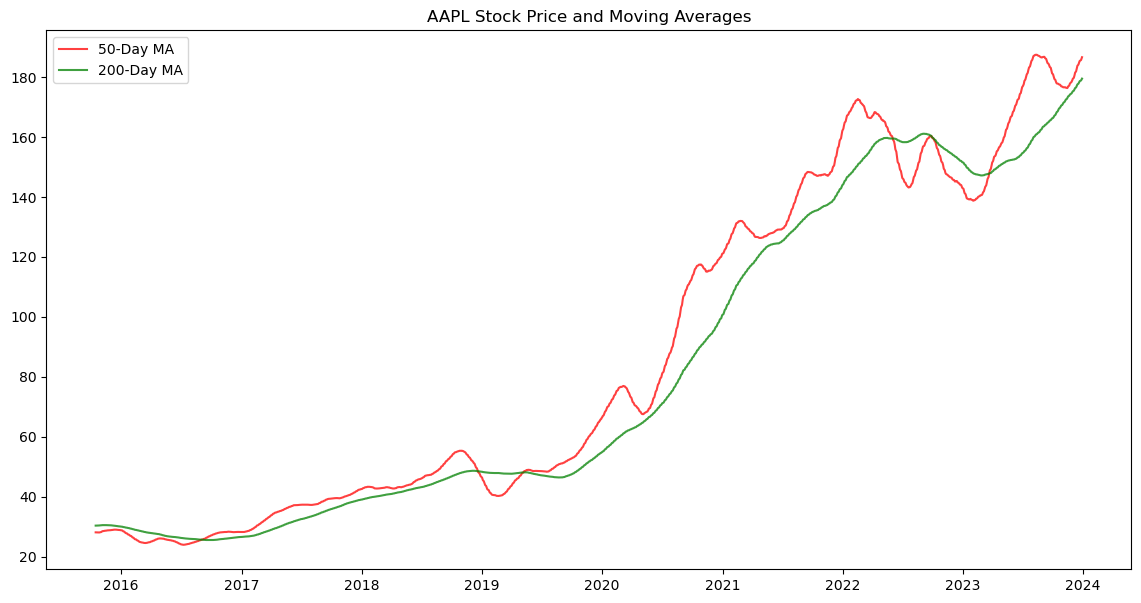

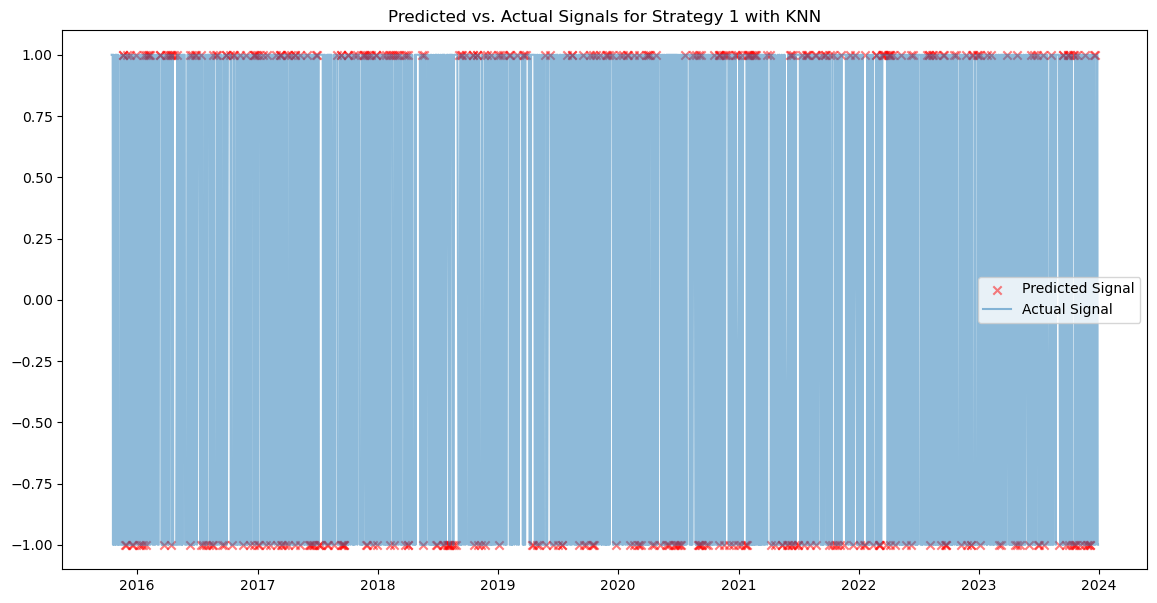

K-Nearest Neighbors (Strategy-1)
Accuracy: 0.5060532687651331
Classification Report:
              precision    recall  f1-score   support

          -1       0.47      0.47      0.47       193
           1       0.54      0.54      0.54       220

    accuracy                           0.51       413
   macro avg       0.50      0.50      0.50       413
weighted avg       0.51      0.51      0.51       413

Test Data with Predicted Target (Strategy-1):
                 Close     Volume  Predicted_Target
Date                                               
2021-02-03  133.940002   89880900                 1
2023-08-07  178.850006   97576100                 1
2021-02-05  136.759995   75693800                 1
2021-01-25  142.919998  157611700                -1
2015-11-27   29.452499   52185600                -1
...                ...        ...               ...
2021-02-19  129.869995   87668800                 1
2018-08-08   51.812500   90102000                -1
2017-02-09   33.105000

Gradient Boosting Classifier (Strategy-2)
Accuracy: 0.9951573849878934
Classification Report:
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99        90
           1       1.00      0.99      1.00       323

    accuracy                           1.00       413
   macro avg       0.99      1.00      0.99       413
weighted avg       1.00      1.00      1.00       413

Test Data with Predicted Target (Strategy-2):
                MA_50      MA_200  Predicted_Target
Date                                               
2021-02-03  128.58380  108.127262                 1
2023-08-07  187.22700  160.188900                 1
2021-02-05  129.44300  108.817425                 1
2021-01-25  126.12340  105.789487                 1
2015-11-27   28.78380   30.465212                -1
...               ...         ...               ...
2021-02-19  131.85980  111.603187                 1
2018-08-08   47.86135   44.417700                 1
2017-02-09   

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix


# Downloading stock data
stock_data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")

print(stock_data)

# Feature engineering: calculating moving averages
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

# Constructing target variables for strategies
stock_data['Target_Strategy_1'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, -1)
stock_data['Target_Strategy_2'] = np.where(stock_data['MA_50'] > stock_data['MA_200'], 1, -1)

stock_data.dropna(inplace=True)

# Splitting data for Strategy-1
X = stock_data[['Close', 'Volume']]
y1 = stock_data['Target_Strategy_1']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

plt.figure(figsize=(14, 7))

plt.plot(stock_data.index, stock_data['MA_50'], label='50-Day MA', color='red', alpha=0.75)
plt.plot(stock_data.index, stock_data['MA_200'], label='200-Day MA', color='green', alpha=0.75)
plt.title('AAPL Stock Price and Moving Averages')
plt.legend()
plt.show()


# Training and evaluating KNN classifier for Strategy-1
knn_classifier_1 = KNeighborsClassifier()
knn_classifier_1.fit(X_train1, y_train1)
y_pred_knn_1 = knn_classifier_1.predict(X_test1)




# Concatenating test data with predicted target values for Strategy-1
test_data_1 = X_test1.copy()
test_data_1['Predicted_Target'] = y_pred_knn_1




# Printing results for KNN classifier for Strategy-1
print("K-Nearest Neighbors (Strategy-1)")
print(f"Accuracy: {accuracy_score(y_test1, y_pred_knn_1)}")
print(f"Classification Report:\n{classification_report(y_test1, y_pred_knn_1)}")
print("Test Data with Predicted Target (Strategy-1):")
print(test_data_1)
print("=" * 50)

conf_matrix_knn_1 = confusion_matrix(y_test1, y_pred_knn_1)
print("Confusion Matrix for KNN Classifier (Strategy-1):")
print(conf_matrix_knn_1)

# Training and evaluating Random Forest classifier for Strategy-1
rf_classifier_1 = RandomForestClassifier()
rf_classifier_1.fit(X_train1, y_train1)
y_pred_rf_1 = rf_classifier_1.predict(X_test1)

# Concatenating test data with predicted target values for Strategy-1
test_data_rf_1 = X_test1.copy()
test_data_rf_1['Predicted_Target'] = y_pred_rf_1

# Printing results for Random Forest classifier for Strategy-1
print("Random Forest Classifier (Strategy-1)")
print(f"Accuracy: {accuracy_score(y_test1, y_pred_rf_1)}")
print(f"Classification Report:\n{classification_report(y_test1, y_pred_rf_1)}")
print("Test Data with Predicted Target (Strategy-1):")
print(test_data_rf_1)
print("=" * 50)

# Training and evaluating Gradient Boosting classifier for Strategy-1
gb_classifier_1 = GradientBoostingClassifier()
gb_classifier_1.fit(X_train1, y_train1)
y_pred_gb_1 = gb_classifier_1.predict(X_test1)

# Concatenating test data with predicted target values for Strategy-1
test_data_gb_1 = X_test1.copy()
test_data_gb_1['Predicted_Target'] = y_pred_gb_1

# Printing results for Gradient Boosting classifier for Strategy-1
print("Gradient Boosting Classifier (Strategy-1)")
print(f"Accuracy: {accuracy_score(y_test1, y_pred_gb_1)}")
print(f"Classification Report:\n{classification_report(y_test1, y_pred_gb_1)}")
print("Test Data with Predicted Target (Strategy-1):")
print(test_data_gb_1)
print("=" * 50)

# Training and evaluating SVM classifier for Strategy-1
svm_classifier_1 = SVC()
svm_classifier_1.fit(X_train1, y_train1)
y_pred_svm_1 = svm_classifier_1.predict(X_test1)

# Concatenating test data with predicted target values for Strategy-1
test_data_svm_1 = X_test1.copy()
test_data_svm_1['Predicted_Target'] = y_pred_svm_1

# Printing results for SVM classifier for Strategy-1
print("Support Vector Machines (Strategy-1)")
print(f"Accuracy: {accuracy_score(y_test1, y_pred_svm_1)}")
print(f"Classification Report:\n{classification_report(y_test1, y_pred_svm_1)}")
print("Test Data with Predicted Target (Strategy-1):")
print(test_data_svm_1)
print("=" * 50)

# Training and evaluating XGBoost classifier for Strategy-1
# Mapping target classes to [0, 1]
y_train1_mapped = (y_train1 + 1) // 2  # Map -1 to 0 and 1 to 1
y_test1_mapped = (y_test1 + 1) // 2

# Training and evaluating XGBoost classifier for Strategy-1
xgb_classifier_1 = XGBClassifier()
xgb_classifier_1.fit(X_train1, y_train1_mapped)
y_pred_xgb_1 = xgb_classifier_1.predict(X_test1)

# Printing results for XGBoost classifier for Strategy-1
print("XGBoost Classifier (Strategy-1)")
print(f"Accuracy: {accuracy_score(y_test1_mapped, y_pred_xgb_1)}")
print(f"Classification Report:\n{classification_report(y_test1_mapped, y_pred_xgb_1)}")
print("=" * 50)

test_data_xgb_1 = X_test1.copy()
test_data_xgb_1['Predicted_Target'] = y_pred_xgb_1

# Printing test data with predicted target for Strategy-1
print("Test Data with Predicted Target (XGBoost, Strategy-1):")
print(test_data_xgb_1)
print("=" * 50)

# Splitting data for Strategy-2
y2 = stock_data['Target_Strategy_2']
X = stock_data[['MA_50', 'MA_200']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Training and evaluating KNN classifier for Strategy-2
knn_classifier_2 = KNeighborsClassifier()
knn_classifier_2.fit(X_train2, y_train2)
y_pred_knn_2 = knn_classifier_2.predict(X_test2)

# Concatenating test data with predicted target values for Strategy-2
test_data_2 = X_test2.copy()
test_data_2['Predicted_Target'] = y_pred_knn_2

# Printing results for KNN classifier for Strategy-2
print("K-Nearest Neighbors (Strategy-2)")
print(f"Accuracy: {accuracy_score(y_test2, y_pred_knn_2)}")
print(f"Classification Report:\n{classification_report(y_test2, y_pred_knn_2)}")
print("Test Data with Predicted Target (Strategy-2):")
print(test_data_2)
print("=" * 50)

# Training and evaluating Random Forest classifier for Strategy-2
rf_classifier_2 = RandomForestClassifier()
rf_classifier_2.fit(X_train2, y_train2)
y_pred_rf_2 = rf_classifier_2.predict(X_test2)

# Concatenating test data with predicted target values for Strategy-2
test_data_rf_2 = X_test2.copy()
test_data_rf_2['Predicted_Target'] = y_pred_rf_2

# Printing results for Random Forest classifier for Strategy-2
print("Random Forest Classifier (Strategy-2)")
print(f"Accuracy: {accuracy_score(y_test2, y_pred_rf_2)}")
print(f"Classification Report:\n{classification_report(y_test2, y_pred_rf_2)}")
print("Test Data with Predicted Target (Strategy-2):")
print(test_data_rf_2)
print("=" * 50)

# Training and evaluating Gradient Boosting classifier for Strategy-2
gb_classifier_2 = GradientBoostingClassifier()
gb_classifier_2.fit(X_train2, y_train2)
y_pred_gb_2 = gb_classifier_2.predict(X_test2)

# Concatenating test data with predicted target values for Strategy-2
test_data_gb_2 = X_test2.copy()
test_data_gb_2['Predicted_Target'] = y_pred_gb_2

# Printing results for Gradient Boosting classifier for Strategy-2
print("Gradient Boosting Classifier (Strategy-2)")
print(f"Accuracy: {accuracy_score(y_test2, y_pred_gb_2)}")
print(f"Classification Report:\n{classification_report(y_test2, y_pred_gb_2)}")
print("Test Data with Predicted Target (Strategy-2):")
print(test_data_gb_2)
print("=" * 50)

# Training and evaluating SVM classifier for Strategy-2
svm_classifier_2 = SVC()
svm_classifier_2.fit(X_train2, y_train2)
y_pred_svm_2 = svm_classifier_2.predict(X_test2)

# Concatenating test data with predicted target values for Strategy-2
test_data_svm_2 = X_test2.copy()
test_data_svm_2['Predicted_Target'] = y_pred_svm_2

# Printing results for SVM classifier for Strategy-2
print("Support Vector Machines (Strategy-2)")
print(f"Accuracy: {accuracy_score(y_test2, y_pred_svm_2)}")
print(f"Classification Report:\n{classification_report(y_test2, y_pred_svm_2)}")
print("Test Data with Predicted Target (Strategy-2):")
print(test_data_svm_2)
print("=" * 50)

# Splitting data for Strategy-2
y2 = stock_data['Target_Strategy_2']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Mapping target classes to [0, 1]
y_train2_mapped = (y_train2 + 1) // 2  # Map -1 to 0 and 1 to 1
y_test2_mapped = (y_test2 + 1) // 2

# Training and evaluating XGBoost classifier for Strategy-2
xgb_classifier_2 = XGBClassifier()
xgb_classifier_2.fit(X_train2, y_train2_mapped)
y_pred_xgb_2 = xgb_classifier_2.predict(X_test2)

# Printing results for XGBoost classifier for Strategy-2
print("XGBoost Classifier (Strategy-2)")
print(f"Accuracy: {accuracy_score(y_test2_mapped, y_pred_xgb_2)}")
print(f"Classification Report:\n{classification_report(y_test2_mapped, y_pred_xgb_2, zero_division=0)}")
print("=" * 50)

test_data_xgb_2 = X_test2.copy()
test_data_xgb_2['Predicted_Target'] = y_pred_xgb_2

# Printing test data with predicted target for Strategy-2
print("Test Data with Predicted Target (XGBoost, Strategy-2):")
print(test_data_xgb_2)
print("=" * 50)



[*********************100%%**********************]  1 of 1 completed


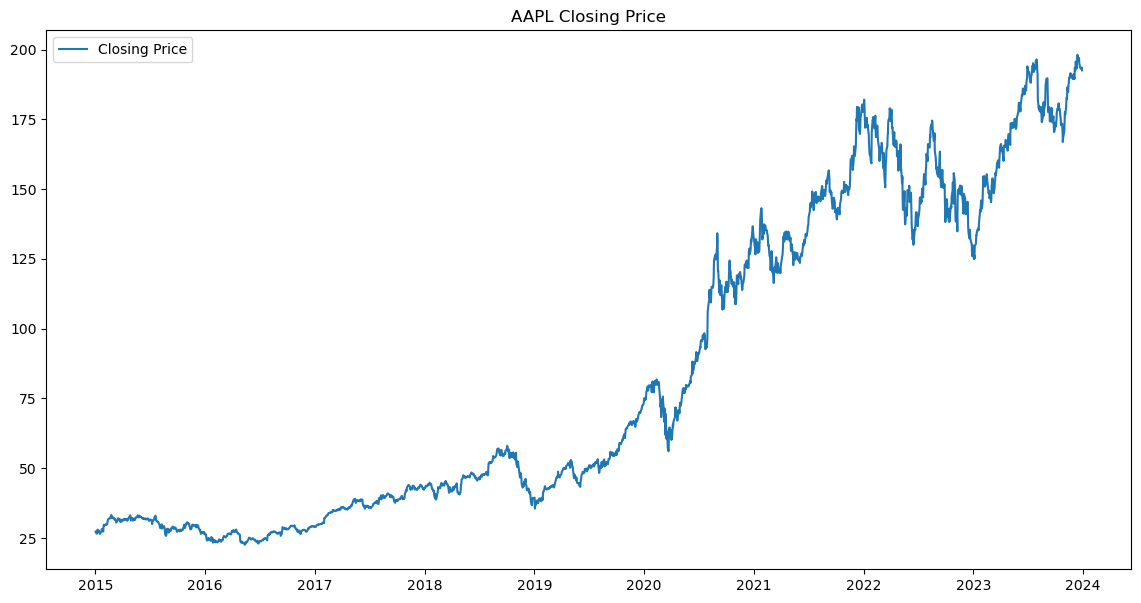

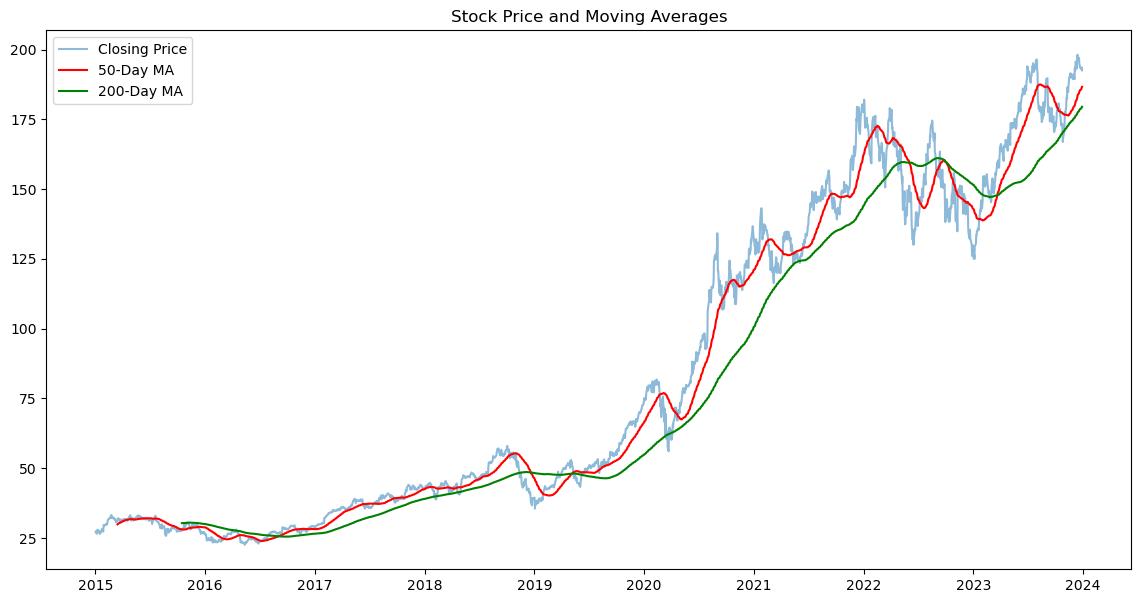

Results for Strategy-1
KNN Classifier:
Accuracy: 0.5060532687651331
Classification Report:
              precision    recall  f1-score   support

          -1       0.47      0.47      0.47       193
           1       0.54      0.54      0.54       220

    accuracy                           0.51       413
   macro avg       0.50      0.50      0.50       413
weighted avg       0.51      0.51      0.51       413

Confusion Matrix:
[[ 90 103]
 [101 119]]
Random Forest Classifier:
Accuracy: 0.48668280871670705
Classification Report:
              precision    recall  f1-score   support

          -1       0.46      0.51      0.48       193
           1       0.52      0.46      0.49       220

    accuracy                           0.49       413
   macro avg       0.49      0.49      0.49       413
weighted avg       0.49      0.49      0.49       413

Confusion Matrix:
[[ 99  94]
 [118 102]]
Gradient Boosting Classifier:
Accuracy: 0.47699757869249393
Classification Report:
           

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

def download_stock_data(symbol, start_date, end_date):
    """Download stock data from Yahoo Finance and visualize closing price."""
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Closing Price')
    plt.title(f'{symbol} Closing Price')
    plt.legend()
    plt.show()
    return stock_data

def calculate_moving_averages(stock_data):
    """Calculate and visualize moving averages for the stock data."""
    stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Closing Price', alpha=0.5)
    plt.plot(stock_data['MA_50'], label='50-Day MA', color='red')
    plt.plot(stock_data['MA_200'], label='200-Day MA', color='green')
    plt.title('Stock Price and Moving Averages')
    plt.legend()
    plt.show()

def construct_target_variables(stock_data):
    """Construct target variables for trading strategies."""
    stock_data['Target_Strategy_1'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, -1)
    stock_data['Target_Strategy_2'] = np.where(stock_data['MA_50'] > stock_data['MA_200'], 1, -1)
    stock_data.dropna(inplace=True)

def train_and_evaluate_classifier(X_train, y_train, X_test, y_test, classifier, name):
    """Train and evaluate a given classifier."""
    # Map target variables for XGBoost
    if name == "XGBoost":
        y_train = (y_train + 1) // 2  # Map -1 to 0 and 1 to 1
        y_test = (y_test + 1) // 2
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # If the classifier is XGBoost and target was mapped, map predictions back to [-1, 1] for consistency in evaluation
    if name == "XGBoost":
        y_pred = y_pred * 2 - 1  # Map 0 back to -1 and 1 back to 1

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=1)  # Set zero_division parameter
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, class_report, conf_matrix, y_pred

def main():
    # Downloading and visualizing stock data
    stock_data = download_stock_data("AAPL", "2015-01-01", "2023-12-31")

    # Feature engineering with visualization
    calculate_moving_averages(stock_data)
    construct_target_variables(stock_data)

    # Splitting data for Strategy-1
    X1 = stock_data[['Close', 'Volume']]
    y1 = stock_data['Target_Strategy_1']
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

    # Splitting data for Strategy-2
    X2 = stock_data[['MA_50', 'MA_200']]
    y2 = stock_data['Target_Strategy_2']
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

    # Define classifiers
    classifiers = {
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "SVM": SVC(),
        "XGBoost": XGBClassifier()
    }

    # Train and evaluate classifiers for Strategy-1
    print("Results for Strategy-1")
    for name, clf in classifiers.items():
        accuracy, class_report, conf_matrix, y_pred = train_and_evaluate_classifier(X_train1, y_train1, X_test1, y_test1, clf,name)
        print(f"{name} Classifier:")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{class_report}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print("=" * 50)

    # Train and evaluate classifiers for Strategy-2
    print("Results for Strategy-2")
    for name, clf in classifiers.items():
        accuracy, class_report, conf_matrix, y_pred = train_and_evaluate_classifier(X_train2, y_train2, X_test2, y_test2, clf,name)
        print(f"{name} Classifier:")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{class_report}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print("=" * 50)

if __name__ == "__main__":
    main()
